epoch: 1, loss_train: 0.3319, accuracy_train: 0.8886, loss_valid: 0.3316, accuracy_valid: 0.8876
epoch: 2, loss_train: 0.2895, accuracy_train: 0.9025, loss_valid: 0.2939, accuracy_valid: 0.9010
epoch: 3, loss_train: 0.2699, accuracy_train: 0.9126, loss_valid: 0.2779, accuracy_valid: 0.9025
epoch: 4, loss_train: 0.2584, accuracy_train: 0.9130, loss_valid: 0.2690, accuracy_valid: 0.9048
epoch: 5, loss_train: 0.2508, accuracy_train: 0.9139, loss_valid: 0.2615, accuracy_valid: 0.9070
epoch: 6, loss_train: 0.2530, accuracy_train: 0.9156, loss_valid: 0.2725, accuracy_valid: 0.9025
epoch: 7, loss_train: 0.2402, accuracy_train: 0.9197, loss_valid: 0.2581, accuracy_valid: 0.9100
epoch: 8, loss_train: 0.2375, accuracy_train: 0.9200, loss_valid: 0.2563, accuracy_valid: 0.9093
epoch: 9, loss_train: 0.2337, accuracy_train: 0.9229, loss_valid: 0.2547, accuracy_valid: 0.9100
epoch: 10, loss_train: 0.2313, accuracy_train: 0.9232, loss_valid: 0.2547, accuracy_valid: 0.9100
epoch: 11, loss_train: 0.2308

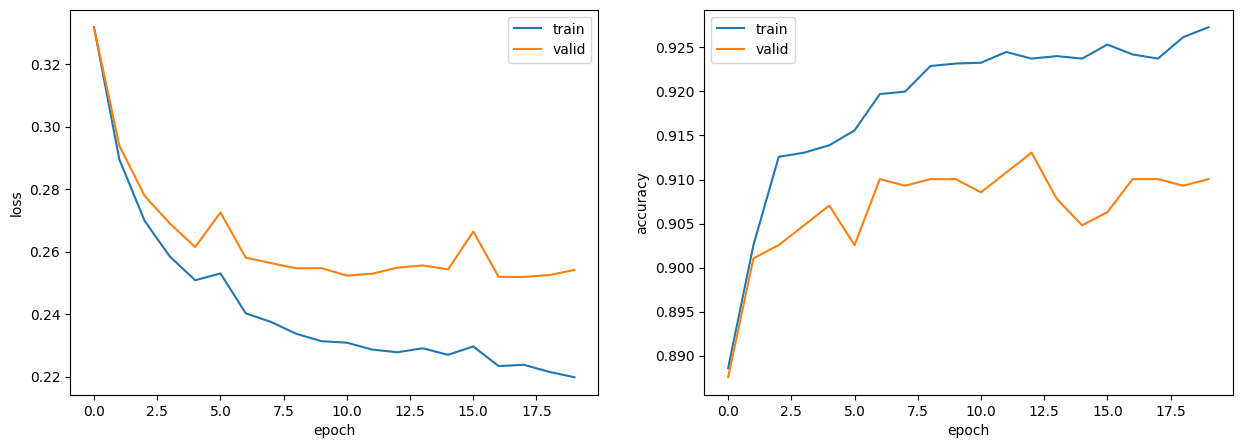

In [ ]:
#75. 損失と正解率のプロット
#問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，
#学習の進捗状況を確認できるようにせよ


# 必要なライブラリのインポート
#from knock72 import *  # knock72モジュールから関数やクラスをインポート
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt
import numpy as np

# モデル、損失関数、オプティマイザの設定
model = SingleLayerPerceptronNetwork(300, 4)  # 入力が300次元、出力が4クラスのシングルレイヤーパセプトロン
criterion = nn.CrossEntropyLoss()  # 損失関数はクロスエントロピー誤差
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)  # 確率的勾配降下法（学習率0.1）

num_epochs = 20  # エポック数の設定

log_train = []  # トレーニングデータのログ
log_valid = []  # 検証データのログ

# トレーニングループ
for epoch in range(num_epochs):
    model.train()  # モデルをトレーニングモードに設定
    loss_train = 0.0  # トレーニングロスの初期化

    # バッチごとのトレーニング
    for inputs, labels in dataloader_train:  # トレーニングデータローダーから入力とラベルを取得
        optimizer.zero_grad()  # 勾配の初期化

        outputs = model(inputs)  # モデルの順伝播
        loss = criterion(outputs, labels)  # ロスの計算
        loss.backward()  # 逆伝播
        optimizer.step()  # パラメータの更新

    # トレーニングと検証のロスと精度の計算
    loss_train, acc_train = calc_loss_acc(model, criterion, dataloader_train)
    loss_valid, acc_valid = calc_loss_acc(model, criterion, dataloader_valid)

    # ログの更新
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # エポックごとの結果を出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')

# ロスと精度のプロット
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # 1行2列のサブプロットを作成
ax[0].plot(np.array(log_train).T[0], label='train')  # トレーニングロスをプロット
ax[0].plot(np.array(log_valid).T[0], label='valid')  # 検証ロスをプロット
ax[0].set_xlabel('epoch')  # x軸ラベルの設定
ax[0].set_ylabel('loss')  # y軸ラベルの設定
ax[0].legend()  # 凡例の表示

ax[1].plot(np.array(log_train).T[1], label='train')  # トレーニング精度をプロット
ax[1].plot(np.array(log_valid).T[1], label='valid')  # 検証精度をプロット
ax[1].set_xlabel('epoch')  # x軸ラベルの設定
ax[1].set_ylabel('accuracy')  # y軸ラベルの設定
ax[1].legend()  # 凡例の表示

# プロットをPNGファイルとして保存
plt.savefig("75.png")
